In [30]:
# # Packages
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install yfinance

In [31]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yfinance as yf


In [32]:


brent_data = yf.download('BZ=F', start='2018-01-01', end='2024-01-01')
dutch_gas_data = yf.download('TTF=F', start='2018-01-01', end='2024-01-01')



brent_data.dropna(inplace=True)
dutch_gas_data.dropna(inplace=True)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [33]:


brent_weighted_avg_price = (brent_data['Close'] * brent_data['Volume']).sum() / brent_data['Volume'].sum()
dutch_gas_weighted_avg_price = (dutch_gas_data['Close'] * dutch_gas_data['Volume']).sum() / dutch_gas_data['Volume'].sum()


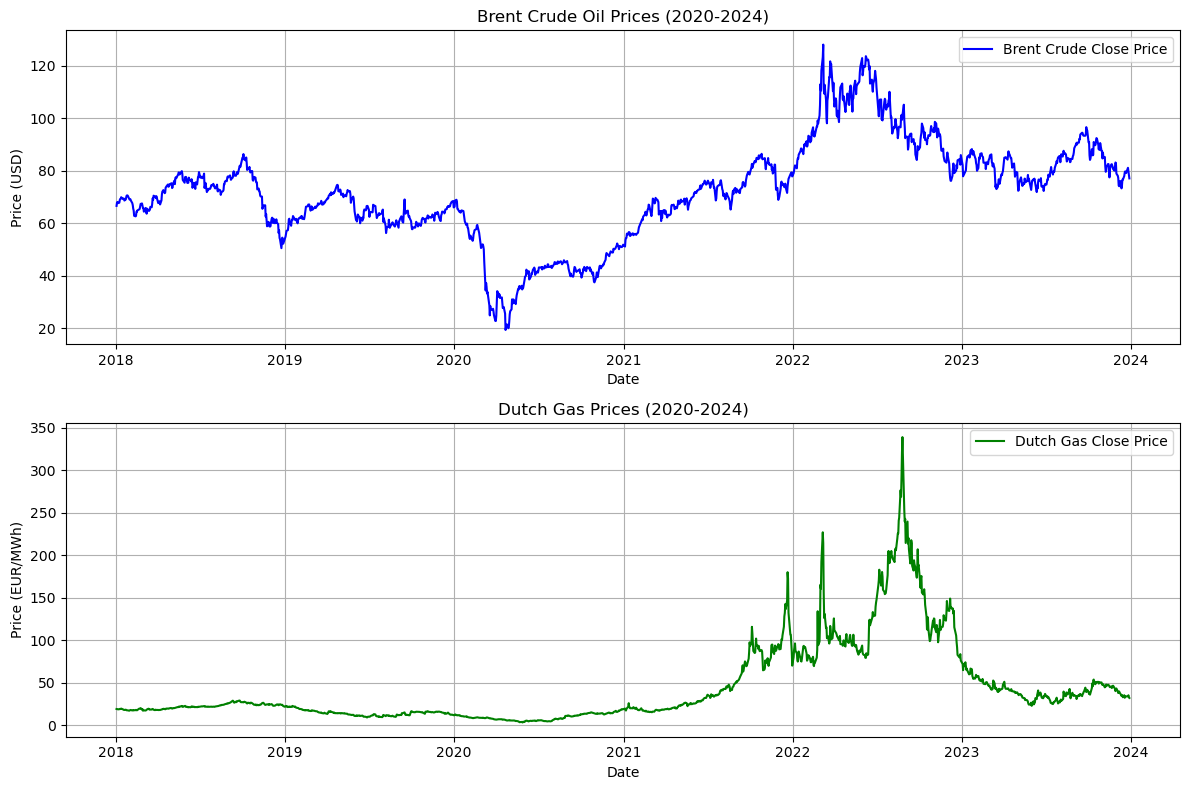

Weighted Average Brent Crude Price: 70.17 USD
Weighted Average Dutch Gas Price: 31.09 EUR/MWh


In [34]:


plt.figure(figsize=(12, 8))

# Plot Brent Crude prices
plt.subplot(2, 1, 1)
plt.plot(brent_data.index, brent_data['Close'], label='Brent Crude Close Price', color='b')
plt.title('Brent Crude Oil Prices (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Plot Dutch Gas prices
plt.subplot(2, 1, 2)
plt.plot(dutch_gas_data.index, dutch_gas_data['Close'], label='Dutch Gas Close Price', color='g')
plt.title('Dutch Gas Prices (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price (EUR/MWh)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


print(f"Weighted Average Brent Crude Price: {brent_weighted_avg_price:.2f} USD")
print(f"Weighted Average Dutch Gas Price: {dutch_gas_weighted_avg_price:.2f} EUR/MWh")

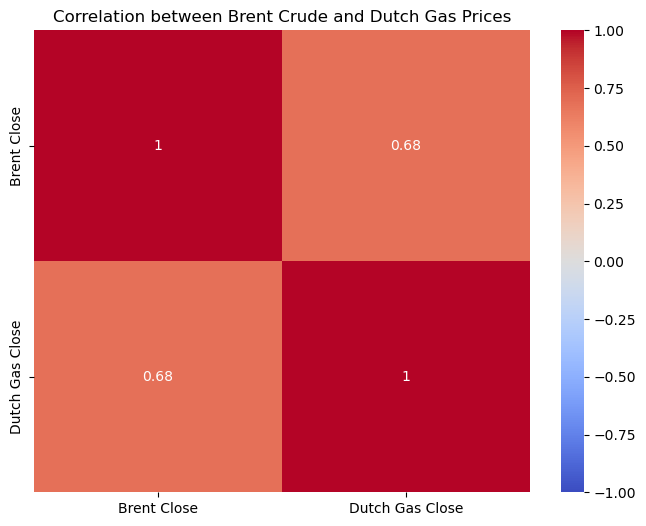

Correlation coefficient between Brent Crude and Dutch Gas prices: 0.68


In [35]:


brent_close = brent_data['Close']
dutch_gas_close = dutch_gas_data['Close']
combined_data = pd.DataFrame({'Brent Close': brent_close, 'Dutch Gas Close': dutch_gas_close})

# Drop any rows with NaN values (if dates don't perfectly align)
combined_data.dropna(inplace=True)


correlation_matrix = combined_data.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Brent Crude and Dutch Gas Prices')
plt.show()


correlation_coefficient = correlation_matrix.loc['Brent Close', 'Dutch Gas Close']
print(f"Correlation coefficient between Brent Crude and Dutch Gas prices: {correlation_coefficient:.2f}")


### Linear Regression
$$
y = \beta_0 + \beta_1 x + \epsilon
$$

### Multiple Linear Regression
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon
$$

### Polynomial Regression (Degree 2)
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon
$$

### Polynomial Regression (Degree \(d\))
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_d x^d + \epsilon
$$

### Logistic Regression
$$
P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n)}}
$$

### Poisson Regression (Log Scale)
$$
\log(\lambda) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$

### Poisson Regression (Exponential Form)
$$
\lambda = e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n}
$$

### Quantile Regression for the \(\tau\)-th Quantile
$$
Q_y(\tau|x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$


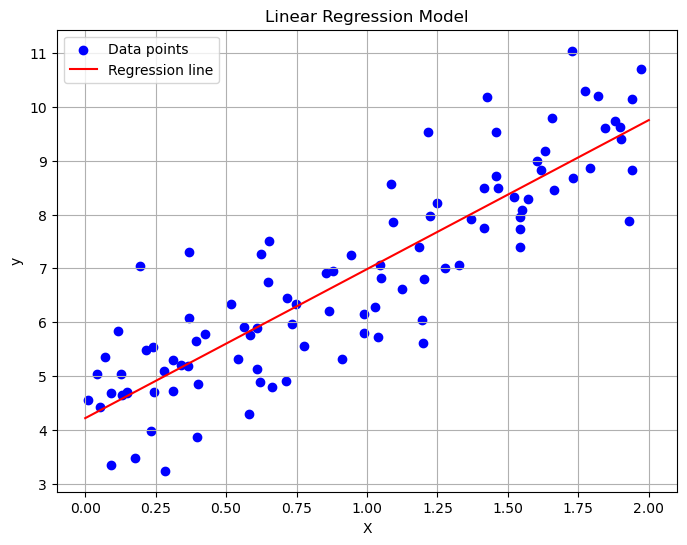

Intercept: 4.22
Coefficient: 2.77


In [36]:
from sklearn.linear_model import LinearRegression


np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # Independent variable (features)
y = 4 + 3 * X + np.random.randn(100, 1)  # Dependent variable (targets) with some noise


model = LinearRegression()
model.fit(X, y)


X_new = np.array([[0], [2]])  # Create new points for the regression line
y_predict = model.predict(X_new)


plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Plot the generated data points
plt.plot(X_new, y_predict, color='red', label='Regression line')  # Plot the regression line
plt.title('Linear Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient: {model.coef_[0][0]:.2f}")

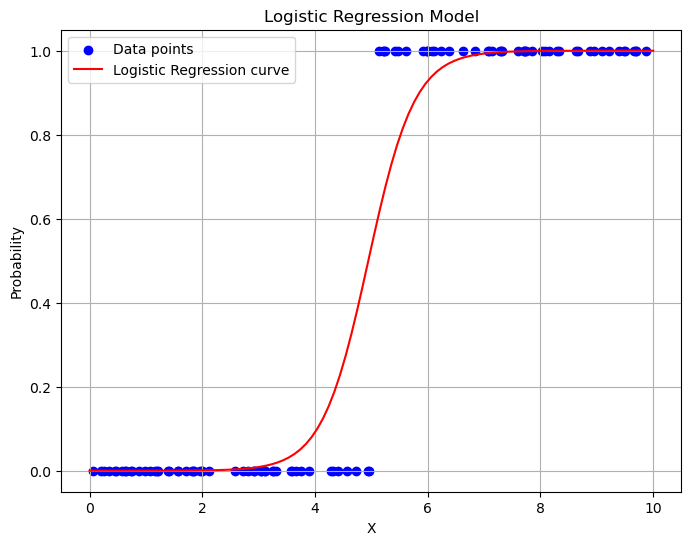

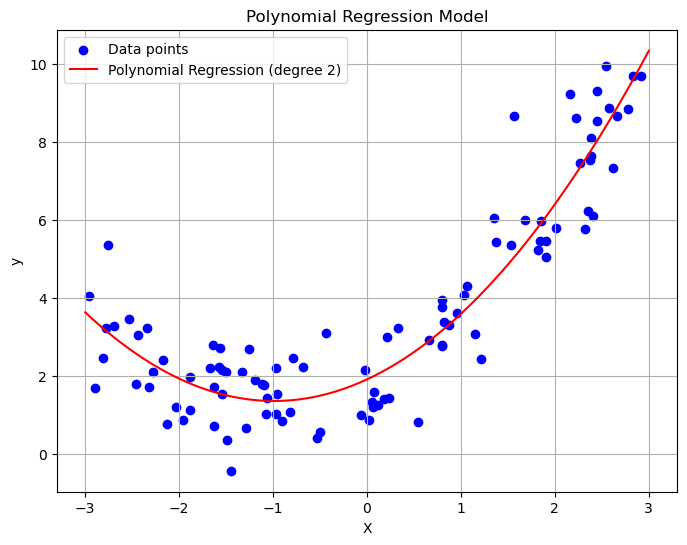

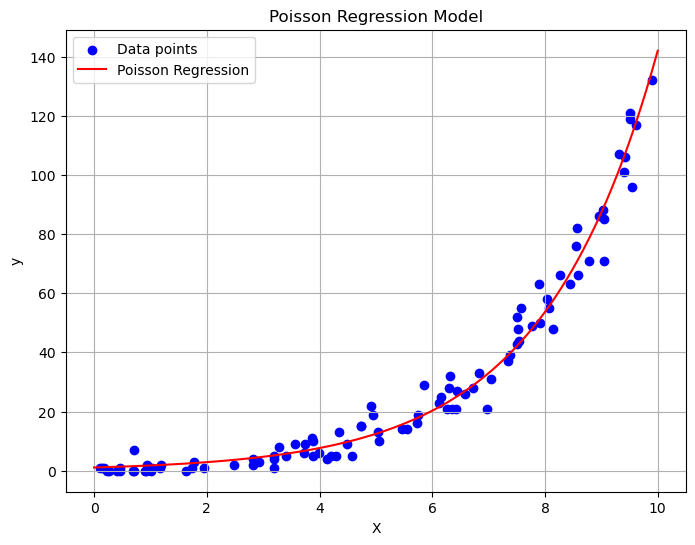

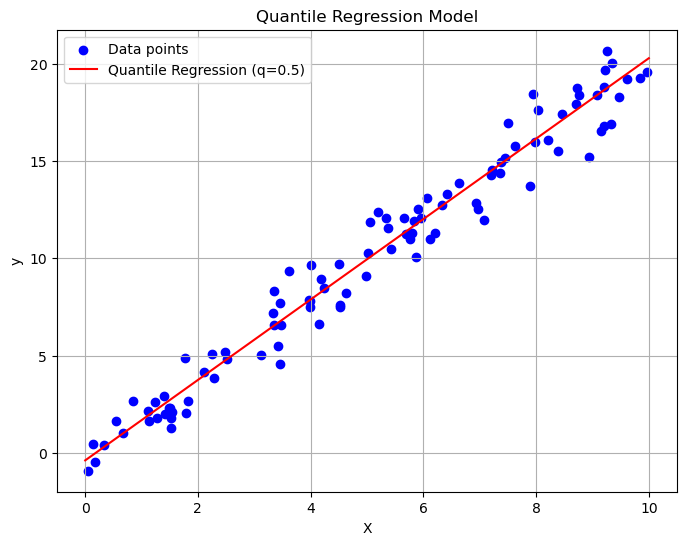

In [37]:

from sklearn.linear_model import LogisticRegression, PoissonRegressor, QuantileRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


np.random.seed(42)
X_log = np.random.rand(100, 1) * 10  # Features
y_log = (X_log > 5).astype(int).ravel()  # Binary target: 1 if X > 5, else 0


log_model = LogisticRegression()
log_model.fit(X_log, y_log)


X_log_range = np.linspace(0, 10, 100).reshape(-1, 1)
y_log_pred = log_model.predict_proba(X_log_range)[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(X_log, y_log, color='blue', label='Data points')
plt.plot(X_log_range, y_log_pred, color='red', label='Logistic Regression curve')
plt.title('Logistic Regression Model')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


X_poly = 6 * np.random.rand(100, 1) - 3  # Features in range [-3, 3]
y_poly = 0.5 * X_poly**2 + X_poly + 2 + np.random.randn(100, 1)  # Quadratic equation with noise


poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_poly, y_poly)


X_poly_range = np.linspace(-3, 3, 100).reshape(-1, 1)
y_poly_pred = poly_model.predict(X_poly_range)

plt.figure(figsize=(8, 6))
plt.scatter(X_poly, y_poly, color='blue', label='Data points')
plt.plot(X_poly_range, y_poly_pred, color='red', label='Polynomial Regression (degree 2)')
plt.title('Polynomial Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


X_pois = np.random.rand(100, 1) * 10  # Features
y_pois = np.random.poisson(lam=np.exp(0.5 * X_pois), size=(100, 1))  # Poisson-distributed targets

pois_model = PoissonRegressor()
pois_model.fit(X_pois, y_pois.ravel())


X_pois_range = np.linspace(0, 10, 100).reshape(-1, 1)
y_pois_pred = pois_model.predict(X_pois_range)

plt.figure(figsize=(8, 6))
plt.scatter(X_pois, y_pois, color='blue', label='Data points')
plt.plot(X_pois_range, y_pois_pred, color='red', label='Poisson Regression')
plt.title('Poisson Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

X_quantile = np.random.rand(100, 1) * 10  # Features
y_quantile = 2 * X_quantile + np.random.randn(100, 1)  # Linear relationship with noise


quant_model = QuantileRegressor(quantile=0.5, alpha=0)
quant_model.fit(X_quantile, y_quantile.ravel())


X_quantile_range = np.linspace(0, 10, 100).reshape(-1, 1)
y_quantile_pred = quant_model.predict(X_quantile_range)

plt.figure(figsize=(8, 6))
plt.scatter(X_quantile, y_quantile, color='blue', label='Data points')
plt.plot(X_quantile_range, y_quantile_pred, color='red', label='Quantile Regression (q=0.5)')
plt.title('Quantile Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()